In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
imdb_tb_df = pd.read_csv('../rawData/zippedData/imdb.title.basics.csv.gz')
# preview file
imdb_tb_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [103]:
imdb_tb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
 # what years of movies are in this table?
imdb_tb_df['start_year'].describe()
# max is outlier

count    146144.000000
mean       2014.621798
std           2.733583
min        2010.000000
25%        2012.000000
50%        2015.000000
75%        2017.000000
max        2115.000000
Name: start_year, dtype: float64

In [10]:
# look up max outlier
imdb_tb_df[imdb_tb_df['start_year'] == 2115]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama


In [13]:
#sort table descending by start year
imdb_tb_df.sort_values(by='start_year', ascending=False, inplace=True) 

In [14]:
imdb_tb_df.head() #check work

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy"


In [105]:
imdb_tb_df['genres'].isna().sum()

5408

In [106]:
imdb_tb_df['genres'].fillna('Unknown')

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                 Unknown
146143             Documentary
Name: genres, Length: 146144, dtype: object

In [107]:
#convert genres to string type
imdb_tb_df['genres'] = imdb_tb_df['genres'].astype('str')

In [127]:
# filter for movies through 2019 aka past, define table
twenty_tens_movies = imdb_tb_df[imdb_tb_df['start_year'] <= 2019]

In [139]:
#rid of Unknown and nan
twenty_tens_movies_cleanedg = twenty_tens_movies[(twenty_tens_movies['genres'] != 'Unknown') & (twenty_tens_movies['genres'] != 'nan')]

In [135]:
top_genres_twenty_10s = twenty_tens_movies_cleanedg['genres'].groupby(twenty_tens_movies_cleanedg['genres']).count().sort_values(ascending=False).head(10)

In [119]:
import numpy as np

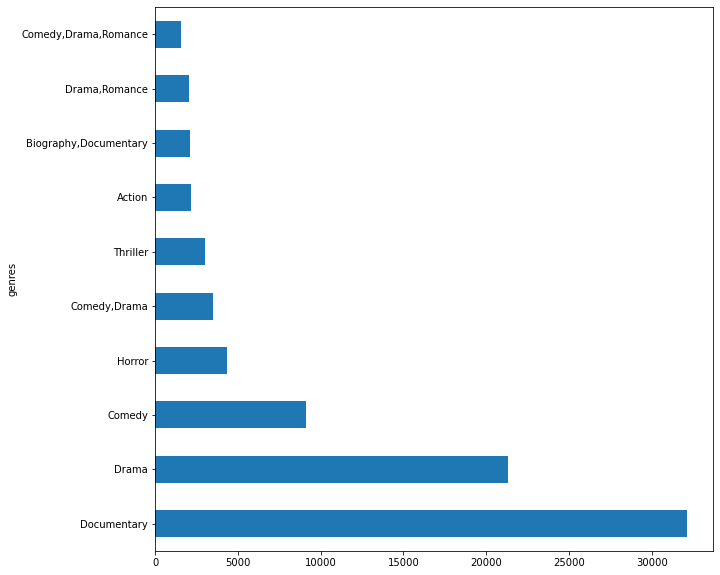

In [164]:
#plot top 20
top_genres_twenty_10s.plot(kind='barh', figsize=(10,10))

In [146]:
# why so many documentaries
twenty_tens_movies_cleanedg['genres'] = twenty_tens_movies_cleanedg['genres'].astype('str')

<ipython-input-146-2cc7c1afc36a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_tens_movies_cleanedg['genres'] = twenty_tens_movies_cleanedg['genres'].astype('str')


In [159]:
#when were documentaries made - 2016 through 2018 was height
twenty_tens_movies_cleanedg[(twenty_tens_movies_cleanedg['genres'] == 'Documentary')].groupby(['start_year']).count()

,tconst,primary_title,original_title,runtime_minutes,genres
start_year,,,,,
2010,2507,2507,2507,2006,2507
2011,2649,2649,2649,2026,2649
2012,2721,2721,2721,2045,2721
2013,2561,2561,2561,1888,2561
2014,2805,2805,2805,2056,2805
2015,3836,3836,3836,3070,3836
2016,4405,4405,4405,3558,4405
2017,4644,4644,4644,3653,4644
2018,4196,4196,4196,3198,4196


In [170]:
twenty_tens_movies_cleanedg[(twenty_tens_movies_cleanedg['genres'] == 'Documentary') & (twenty_tens_movies_cleanedg['start_year'] >= 2016)]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
14,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary
25,tt0262759,Seven Jews from My Class,Siedmiu Zydów z mojej klasy,2018,40.0,Documentary
31,tt0285423,Abolição,Abolição,2019,NaN,Documentary
59,tt0368133,The Promise of Perfume,The Promise of Perfume,2017,57.0,Documentary
346,tt0844699,Ivan Mosjoukine ou L'enfant du carnaval,Ivan Mosjoukine ou L'enfant du carnaval,2016,67.0,Documentary
...,...,...,...,...,...,...
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary
146126,tt9914644,9/11: Escape from the Towers,9/11: Escape from the Towers,2018,120.0,Documentary
146130,tt9915436,Vida em Movimento,Vida em Movimento,2019,70.0,Documentary
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
